In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_csv("BBNI_JK.csv", delimiter=',')

In [4]:
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)

In [5]:
df['Date'].min(), df['Date'].max()

(Timestamp('2003-12-01 00:00:00'), Timestamp('2019-10-01 00:00:00'))

In [6]:
cols =['Open','High','Low','Adj Close','Volume']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('Date')

df.isnull().sum()

Date     0
Close    0
dtype: int64

In [7]:
df = df.groupby('Date')['Close'].sum().reset_index()

In [8]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2003-12-01', '2004-01-01', '2004-02-01', '2004-03-01',
               '2004-04-01', '2004-05-01', '2004-06-01', '2004-07-01',
               '2004-08-01', '2004-09-01',
               ...
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01'],
              dtype='datetime64[ns]', name='Date', length=191, freq=None)

In [12]:
st = sm.tsa.adfuller(array,regression='c')
print('p-value:{}'.format(st[1]))

p-value:0.9204352295274327


In [13]:
st = sm.tsa.adfuller(array.diff().dropna(),regression='c')
print('p-value:{}'.format(st[1]))

p-value:0.02400244836463174


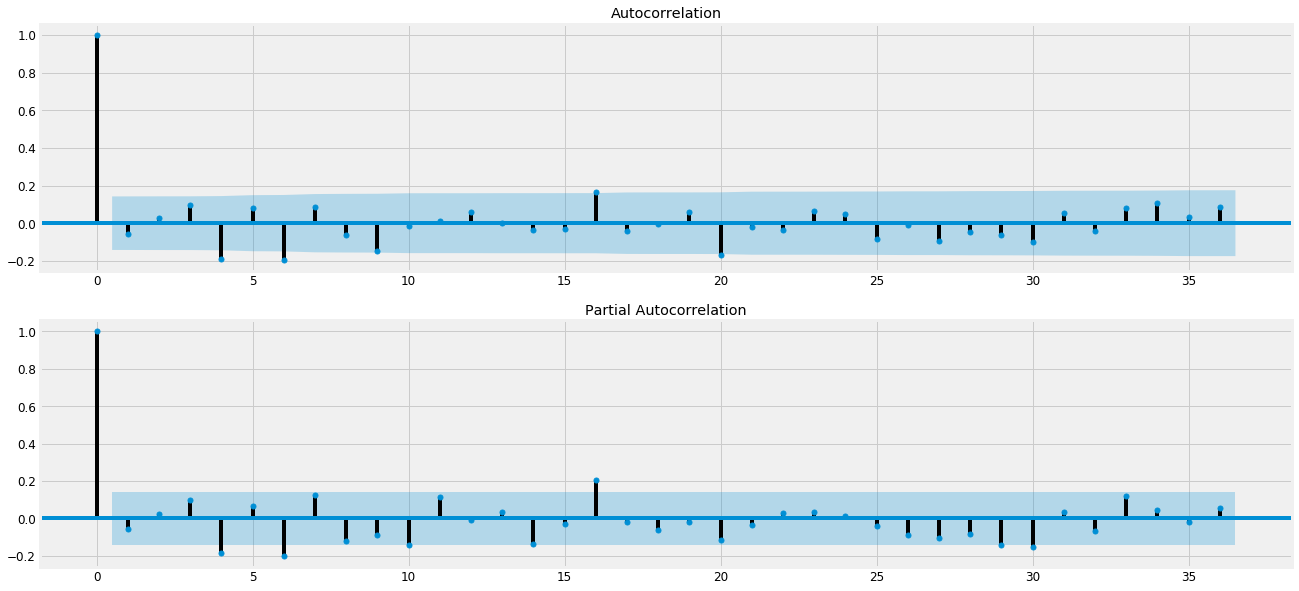

In [18]:
fig,ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(array.diff().dropna(), lags=36, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(array.diff().dropna(), lags=36, ax=ax[1])
plt.show()

In [30]:
p = d = q = range(0, 5)
pdq = list(itertools.product(p, [1], q))
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 0, 1, 1)
SARIMAX: (0, 1, 1) x (0, 1, 0, 1)
SARIMAX: (0, 1, 2) x (0, 1, 1, 1)
SARIMAX: (0, 1, 2) x (0, 1, 1, 1)


In [32]:
params = []  
aics = [] 
mses = [] 

for param in pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(array,
                                            order = param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            
            pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
            array_forecasted = pred.predicted_mean
            array_truth = array['2017-01-01':]
            mse = ((array_forecasted - array_truth) ** 2).mean()
            
            params.append(param)
            aics.append(results.aic)
            mses.append(mse)
            
            print('ARIMA{} - AIC:{} - MSE:{}'.format(param,
                                                         round(results.aic, 2),
                                                         round(mse, 2)))  
            
        except:
            continue
            
print('Best Parameter :')
min_ind = aics.index(min(aics)) 
bestparam = (params[min_ind]) 
print('ARIMA',bestparam,' - AIC:',min(aics)) 
min_ind = mses.index(min(mses)) 
bestparam = (params[min_ind]) 
print(bestparam,' - MSE:',min(mses))

ARIMA(0, 1, 0) - AIC:2806.67 - MSE:454517.05
ARIMA(0, 1, 1) - AIC:2794.4 - MSE:444649.12
ARIMA(0, 1, 2) - AIC:2782.07 - MSE:439467.49
ARIMA(0, 1, 3) - AIC:2767.91 - MSE:426743.06
ARIMA(0, 1, 4) - AIC:2743.51 - MSE:369822.95
ARIMA(1, 1, 0) - AIC:2808.21 - MSE:443866.57
ARIMA(1, 1, 1) - AIC:2796.33 - MSE:443568.18
ARIMA(1, 1, 2) - AIC:2775.55 - MSE:407938.74
ARIMA(1, 1, 3) - AIC:2757.88 - MSE:380375.11
ARIMA(1, 1, 4) - AIC:2744.55 - MSE:381080.11
ARIMA(2, 1, 0) - AIC:2796.18 - MSE:443313.85
ARIMA(2, 1, 1) - AIC:2800.46 - MSE:434581.48
ARIMA(2, 1, 2) - AIC:2768.52 - MSE:381033.47
ARIMA(2, 1, 3) - AIC:2755.62 - MSE:390222.72
ARIMA(2, 1, 4) - AIC:2745.13 - MSE:352394.35
ARIMA(3, 1, 0) - AIC:2782.13 - MSE:424410.25
ARIMA(3, 1, 1) - AIC:2770.06 - MSE:375987.13
ARIMA(3, 1, 2) - AIC:2769.11 - MSE:383552.06
ARIMA(3, 1, 3) - AIC:2756.88 - MSE:387922.35
ARIMA(3, 1, 4) - AIC:2745.02 - MSE:378234.52
ARIMA(4, 1, 0) - AIC:2764.5 - MSE:406945.22
ARIMA(4, 1, 1) - AIC:2755.84 - MSE:384078.25
ARIMA(4, 1, 

/home/drgo/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(4, 1, 3) - AIC:2757.77 - MSE:366814.06
ARIMA(4, 1, 4) - AIC:2743.86 - MSE:301783.82
Best Parameter :
ARIMA (0, 1, 4)  - AIC: 2743.511027580982
(4, 1, 4)  - MSE: 301783.819203144


/home/drgo/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [33]:
model = sm.tsa.statespace.SARIMAX(array,
                                order=(0, 1, 4),
                                seasonal_order=(0, 0, 0, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                  Close   No. Observations:                  191
Model:               SARIMAX(0, 1, 4)   Log Likelihood               -1366.756
Date:                Fri, 18 Oct 2019   AIC                           2743.511
Time:                        23:59:22   BIC                           2759.613
Sample:                    12-01-2003   HQIC                          2750.037
                         - 10-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0147      0.063      0.234      0.815      -0.108       0.137
ma.L2         -0.0691      0.071     -0.975      0.329      -0.208       0.070
ma.L3          0.2306      0.051      4.553      0.0

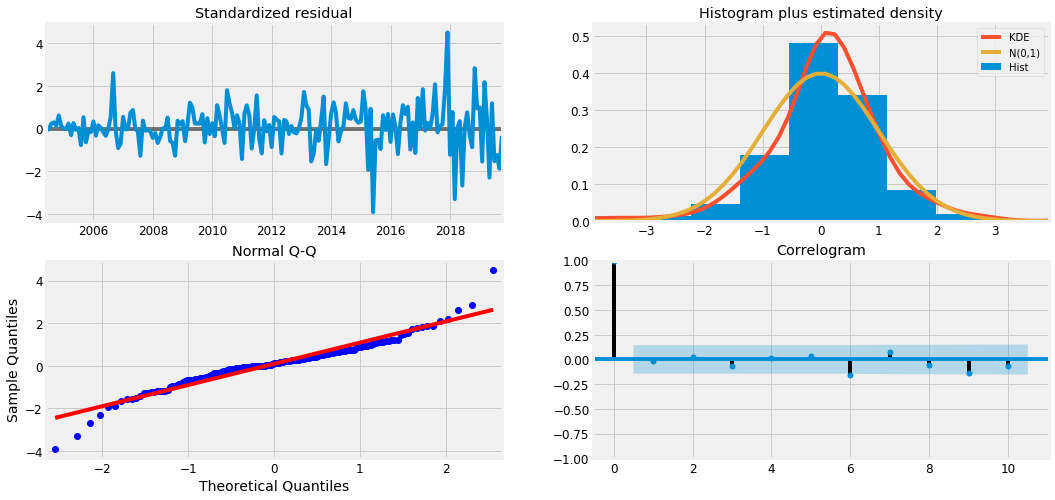

In [34]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

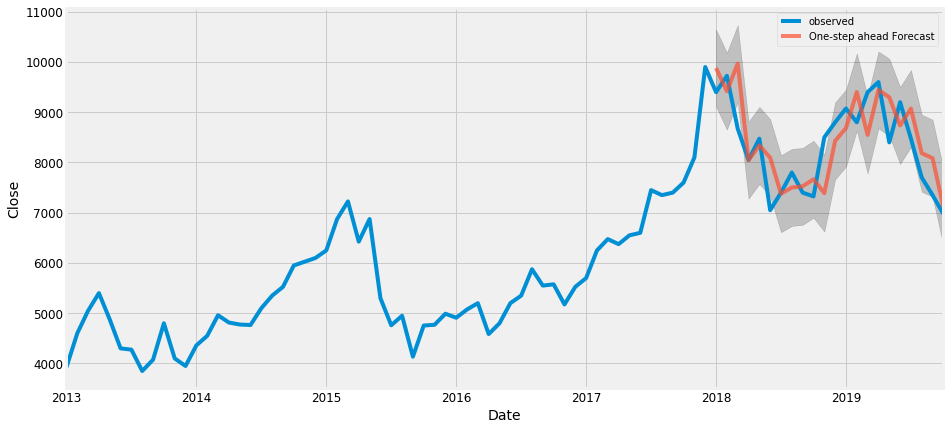

In [35]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = array['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()
plt.show()

In [36]:
array_forecasted = pred.predicted_mean
array_truth = array['2017-01-01':]
mse = ((array_forecasted - array_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 369822.95


In [37]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 608.13


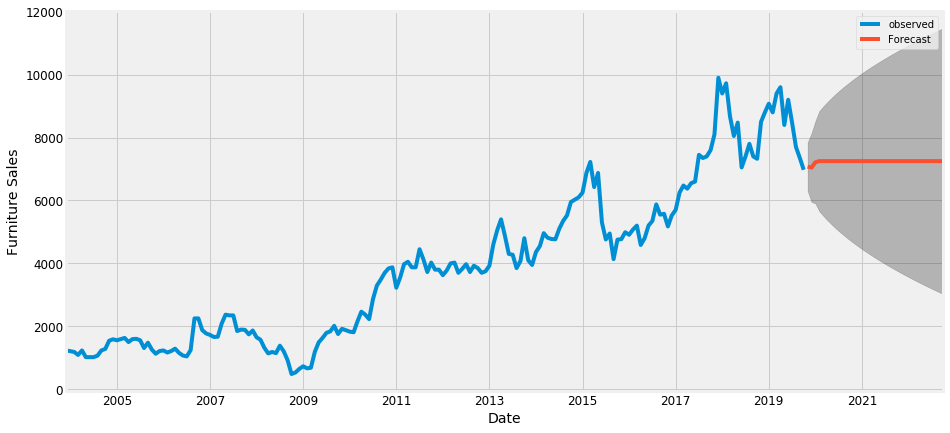

In [40]:
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()
ax = array.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [28]:
forecast = results.forecast(steps=36)

print(forecast)


2019-11-01    7307.997963
2019-12-01    7007.853334
2020-01-01    7217.205349
2020-02-01    7123.081732
2020-03-01    7106.452922
2020-04-01    7207.380146
2020-05-01    7060.547721
2020-06-01    7213.375209
2020-07-01    7087.409446
2020-08-01    7166.040486
2020-09-01    7141.172086
2020-10-01    7118.305982
2020-11-01    7174.257651
2020-12-01    7103.668743
2021-01-01    7171.252566
2021-02-01    7120.028481
2021-03-01    7147.697156
2021-04-01    7144.412067
2021-05-01    7127.701018
2021-06-01    7156.796451
2021-07-01    7123.908256
2021-08-01    7152.998442
2021-09-01    7132.934080
2021-10-01    7141.698060
2021-11-01    7143.698979
2021-12-01    7133.583992
2022-01-01    7148.034739
2022-02-01    7133.138217
2022-03-01    7145.306668
2022-04-01    7137.816327
2022-05-01    7140.051365
2022-06-01    7142.441870
2022-07-01    7136.881471
2022-08-01    7143.802937
2022-09-01    7137.234879
2022-10-01    7142.164423
Freq: MS, dtype: float64


In [23]:
from fbprophet import Prophet
df_model = Prophet(interval_width=0.95)
df_model.fit(df)

df_forecast = df_model.make_future_dataframe(periods=36, freq='MS')
df_forecast = df_model.predict(df_forecast)

ModuleNotFoundError: No module named 'fbprophet'